In [2]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error # MSE

# 캘리포니아 주택 데이터셋 로드
california = fetch_california_housing()
X, y = pd.DataFrame(california.data, columns=california.feature_names), california.target

<Axes: ylabel='MedInc'>

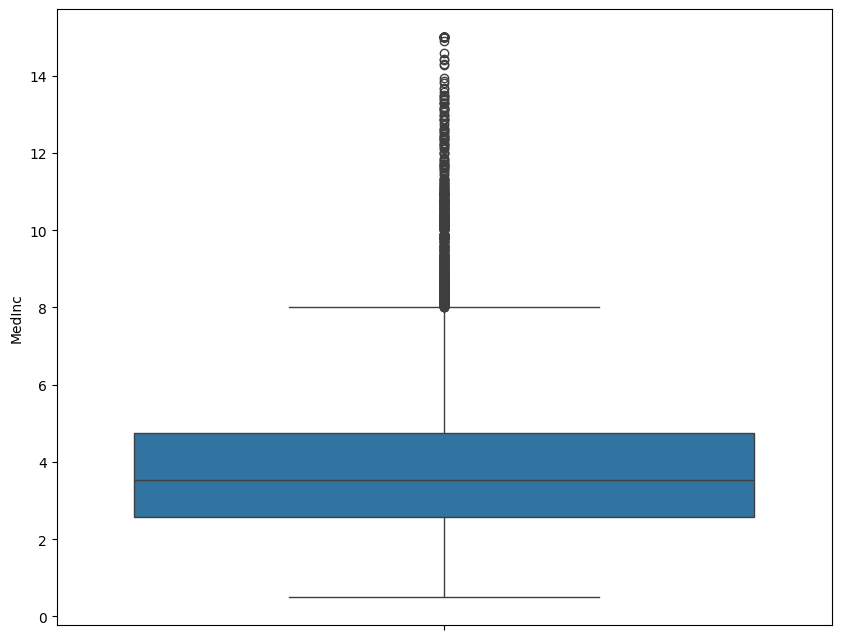

In [3]:
# 이상치 데이터 확인

plt.figure(figsize=(10,8))
sns.boxplot(y='MedInc',data=X)

### 소득과 집값으로 간단한 회귀분석 진행
### 회귀분석을 통해 -> 성능에 대한 확인을 할 예정
### 이상치를 1번 날리고 -> 2번 날려서 -> 선형적으로 변화하면서 성능이 좋아지는 것

In [4]:
X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [5]:
## 이상치를 날리지 않고, 이 부분을 살려서 성능을 개선하는 방법
X_df =X['MedInc']
X_train,X_test,y_train,y_test = train_test_split(X_df, y, train_size=0.7, test_size=0.3, random_state=111)

In [6]:
# 단순 선형회귀 학습
lr= LinearRegression(fit_intercept=True)
lr.fit(np.array(X_train).reshape(-1,1), y_train)

LinearRegression()

In [7]:
# 예측값을 베이스로 확인해 보자!
y_pred1= lr.predict(np.array(X_test).reshape(-1,1))
mse1= mean_squared_error(y_test, y_pred1)

In [8]:
print('R-s: {:8f}'.format(lr.score(np.array(X_train).reshape(-1,1),y_train)))
print(f'MSE: {mse1}')

R-s: 0.475201
MSE: 0.7144365385330999


(array([ 365., 1882., 3570., 3866., 3484., 2614., 1832., 1158.,  683.,
         377.,  294.,  134.,   72.,  106.,   69.,   24.,   24.,   23.,
           6.,   57.]),
 array([ 0.4999 ,  1.22491,  1.94992,  2.67493,  3.39994,  4.12495,
         4.84996,  5.57497,  6.29998,  7.02499,  7.75   ,  8.47501,
         9.20002,  9.92503, 10.65004, 11.37505, 12.10006, 12.82507,
        13.55008, 14.27509, 15.0001 ]),
 <BarContainer object of 20 artists>)

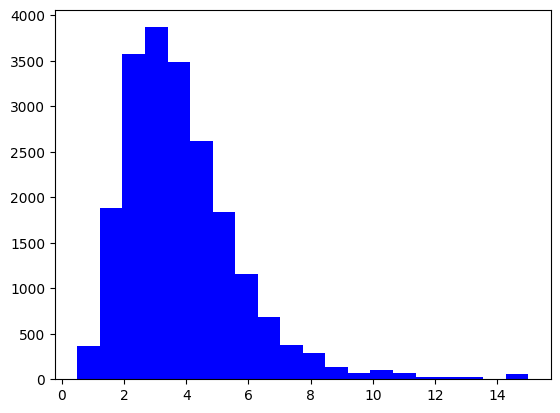

In [9]:
## 데이터 분포 확인
plt.hist(X['MedInc'],bins=20, color='blue')

<Axes: xlabel='MedInc'>

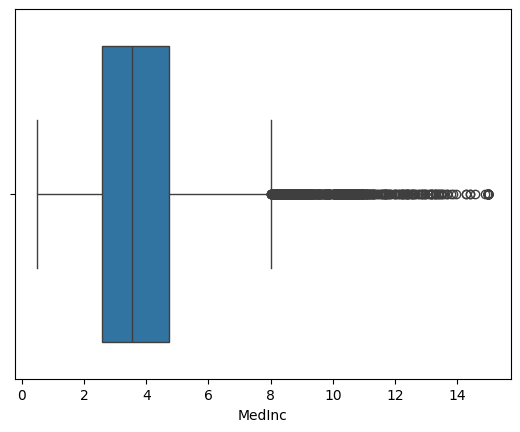

In [10]:
sns.boxplot(x=X['MedInc'])

In [11]:
# OLS로 평가
X_const = sm.add_constant(X['MedInc']) #상수항 추가
ml1 = sm.OLS(y, X_const).fit()
print(ml1.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.473
Model:                            OLS   Adj. R-squared:                  0.473
Method:                 Least Squares   F-statistic:                 1.856e+04
Date:                Thu, 28 Mar 2024   Prob (F-statistic):               0.00
Time:                        09:45:06   Log-Likelihood:                -25623.
No. Observations:               20640   AIC:                         5.125e+04
Df Residuals:                   20638   BIC:                         5.127e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4509      0.013     34.082      0.0

# 이상치를 확인하고, 전처리하기

In [12]:
Q1= X['MedInc'].quantile(0.25)
Q3= X['MedInc'].quantile(0.75)

# IQR
IQR= Q3-Q1

# 이상치 데이터만 추출
X['Outlier']=((X['MedInc']< (Q1-1.5*IQR)) | (X['MedInc']> (Q3+1.5*IQR)))

# 이상치/이상치 아닌 데이터 각각 확인
non_outlier_prices = y[X['Outlier'] == False]
outlire_prices = y[X['Outlier'] == True]

In [13]:
X['Outlier'].unique()

array([ True, False])

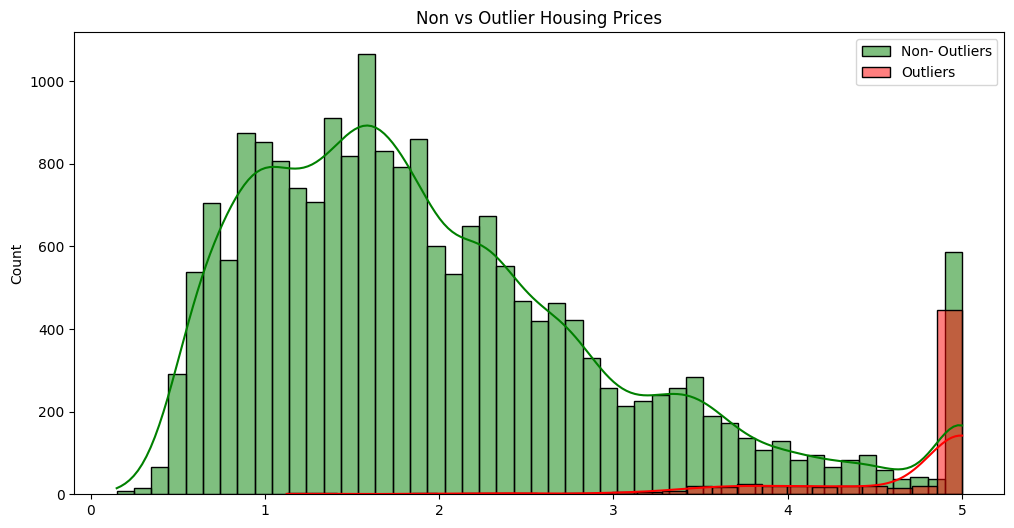

In [14]:
# 시각화를 통해 비교
plt.figure(figsize=(12,6))
sns.histplot(non_outlier_prices, color='green', kde=True, label='Non- Outliers')
sns.histplot(outlire_prices, color='red', kde=True, label='Outliers')
plt.title('Non vs Outlier Housing Prices')
plt.legend()
plt.show()

In [15]:
len(non_outlier_prices)

19959

In [16]:
len(outlire_prices) # 이상치는 681정도

681

#### 이상치가 있는 데이터와 이상치가 없는 데이터의 평균 차이가 유의미한가?

In [17]:
from scipy import stats

# 이상치와 이상치가 아닌 값들의 집값 데이터 : scipy 라이브러리의 t-검정, p-검정을 수행하는 함수
t_stat, p_value = stats.ttest_ind(non_outlier_prices, outlire_prices, equal_var=False )

print(f'T-static : {t_stat}')
print(f'p-value : {p_value}')

T-static : -96.60151073759215
p-value : 0.0


In [18]:
# p-value
if p_value <0.05:
    print('이상치 있는 집값, 없는 집값 평균차이 통계적으로 유의미하다.')
else:
    print('이상치 있는 집값, 없는 집값 평균차이 통계적으로 유의미하지 않다.')

이상치 있는 집값, 없는 집값 평균차이 통계적으로 유의미하다.


#### 회귀분석읉 통해 이상치에 대한 파생변수를 만들었을 때의 성능 비교

In [19]:
# 캘리포니아 주택 데이터셋 로드
california = fetch_california_housing()
X, y = pd.DataFrame(california.data, columns=california.feature_names), california.target

In [20]:
# IQR 지수로 0,1 이진분류로 이상치에 대해서 좀 더 가중치를 둬서 학습하면 실제 성능이 조금은 올라갈까?
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

# 이상치 파생변수 만들기
X['MedInc_outlier'] = ((X['MedInc']<lower_bound) | (X['MedInc'] > upper_bound)).astype(int)

In [21]:
X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedInc_outlier
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,1
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,1
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,0
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,0
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,0
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0


In [22]:
# 이상치 날리지 않고 성능 개선하기
X_df =X[['MedInc','MedInc_outlier']]
X_train,X_test,y_train,y_test = train_test_split(X_df, y, train_size=0.7, test_size=0.3, random_state=111)

In [23]:
# 이상치 피처를 넣은 선형회귀 학습

lr1= LinearRegression(fit_intercept=True)
lr1.fit(X_train, y_train)

LinearRegression()

In [24]:
# 이상치 피처를 추가한 예측값을 베이스로 확인해 보자!
y_pred2= lr1.predict(X_test)
mse2= mean_squared_error(y_test, y_pred2)

In [25]:
# 이상치 피처를 추가한 예측값을 베이스로 확인해 보자!
y_pred2= lr1.predict(X_test)
mse2= mean_squared_error(y_test, y_pred2)

In [26]:
print('R-square{:.5f}'.format(lr1.score(X_train, y_train)))
print(f'MSE:{mse2}')

R-square0.47542
MSE:0.7142016307342004


In [27]:
# OLS로 평가
X_const1 = sm.add_constant(X[['MedInc','MedInc_outlier']]) #상수항 추가
ml2 = sm.OLS(y, X_const1).fit()
print(ml2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.474
Model:                            OLS   Adj. R-squared:                  0.474
Method:                 Least Squares   F-statistic:                     9285.
Date:                Thu, 28 Mar 2024   Prob (F-statistic):               0.00
Time:                        09:45:08   Log-Likelihood:                -25619.
No. Observations:               20640   AIC:                         5.124e+04
Df Residuals:                   20637   BIC:                         5.127e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.4290      0.015     27.

In [28]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [29]:
df = pd.read_csv('/content/drive/MyDrive/대외활동/BDA/4주차/movie_rv.csv')

In [30]:
df_sp=df[:50000]

In [31]:
df_sp=df_sp.dropna()

In [32]:
# Sklearn CounterVectorizer
from sklearn.feature_extraction.text import CountVectorizer

re_cv = CountVectorizer(max_features=1000)

In [33]:
df_sp_docu=df_sp['document']
df_sp_docu

0                                      아 더빙.. 진짜 짜증나네요 목소리
1                        흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나
2                                        너무재밓었다그래서보는것을추천한다
3                            교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정
4        사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...
                               ...                        
49995    "이게 소위 스페인식 Neo-realism 이란 건가? - 물론, ""아동 판타지"...
49996                                     보지마셈 저 믿으세요 보지마셈
49997                                                 최고졸작
49998                                    재밌고 좋았음 10자 쓰라고?!
49999                                 소박하지만 잔잔한 감동을 주는 영화.
Name: document, Length: 49999, dtype: object

In [34]:
# 리뷰안에 데이터 넣어서 어떤 식으로 전처리 되는지
re_cnv=re_cv.fit_transform(df_sp_docu)

In [35]:
# 내가 선정한 피처들은 무엇이 있는지?
re_cv.get_feature_names_out()[:100]

array(['0점', '0점은', '10', '10자', '10점', '1점', '1점도', '2점', '3류', '3점',
       '4점', '80년대', '90년대', '9점', 'b급', 'good', 'oo', 'ooo', 'ooo기',
       'ost', 'the', 'tv', 'ㄷㄷ', 'ㅅㅂ', 'ㅇㅇ', 'ㅉㅉ', 'ㅋㅋ', 'ㅋㅋㅋ', 'ㅋㅋㅋㅋ',
       'ㅋㅋㅋㅋㅋ', 'ㅎㅎ', 'ㅎㅎㅎ', 'ㅜㅜ', 'ㅠㅠ', 'ㅠㅠㅠ', 'ㅡㅡ', '가끔', '가는', '가볍게',
       '가서', '가슴', '가슴이', '가장', '가지고', '가진', '각본', '간만에', '갈수록', '감독',
       '감독님', '감독은', '감독의', '감독이', '감동', '감동과', '감동도', '감동을', '감동이',
       '감동적이고', '감동적인', '감사합니다', '갑자기', '강추', '같네요', '같다', '같습니다', '같아서',
       '같아요', '같은', '같은데', '같음', '같이', '개봉', '개뿔', '개연성', '개인적으로', '거의',
       '건지', '걸작', '겁나', '것도', '것은', '것을', '것이', '것이다', '게다가', '결국', '결말',
       '결말도', '결말은', '결말이', '계속', '공감이', '공포', '공포영화', '과연', '괜찮은', '괜히',
       '굉장히', '구성'], dtype=object)

#### 형태소로 나누기

In [36]:
pip install konlpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 36.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 488.6/488.6 kB 34.7 MB/s eta 0:00:00


In [37]:
#konlpy 패키지 사용하시면 됩니다.
from konlpy.tag import Okt

In [41]:
tw_tag= Okt()

In [42]:
#형태소로 추출 예정
print(tw_tag.nouns(df_sp['document'][2]))

['무재', '밓었', '다그', '래서', '추천']


In [43]:
# 하나의 토크나이저 함수 만들어서 전체 전처리 해보자!

def my_token(doc):
    return [token for token, pos in tw_tag.pos(doc) if pos in ['Noun','Verb']]

In [44]:
# 사이킷런의 countvectorizer 하이퍼파라미터에 그대로 넣으면 된다.

re_cv_mt = CountVectorizer(max_features=1000, tokenizer= my_token)

In [45]:
# 리뷰안에 데이터 넣어서 어떤 식으로 전처리 되는지
re_cnv_mt=re_cv_mt.fit_transform(df_sp_docu)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [46]:
# 내가 선정한 피처들은 무엇이 있는지?
re_cv_mt.get_feature_names_out()[:100]

array(['가', '가끔', '가는', '가면', '가서', '가슴', '가요', '가장', '가족', '가지', '가진',
       '가치', '각본', '간', '간다', '간만', '갈수록', '감', '감독', '감동', '감명', '감사합니다',
       '감상', '감성', '감정', '갑자기', '강', '강추', '개', '개그', '개봉', '개연', '개인',
       '개판', '거', '거기', '거리', '거의', '거지', '건', '건가', '건지', '걸', '걸까',
       '걸작', '겁나', '것', '게', '게이', '게임', '결론', '결말', '결혼', '경찰', '계속',
       '고', '고민', '고생', '곳', '공감', '공포', '공포영화', '과', '과거', '과연', '과정',
       '관', '관객', '관계', '관람', '관심', '광고', '괴물', '교훈', '구', '구성', '군대',
       '굳이', '굿', '귀신', '그', '그것', '그게', '그냥', '그녀', '그닥', '그대로', '그때',
       '그래픽', '그리', '그린', '그림', '극장', '극장판', '글', '급', '기', '기대', '기도',
       '기본'], dtype=object)

코사인유사도로 계산해서 유사한 리뷰 확인하기

In [47]:
from sklearn.metrics.pairwise import cosine_similarity

st = len(df_sp_docu[120])//2

source = df_sp_docu[120][-st:]

In [48]:
df_sp_docu[120]

'중국인 특유의 과장, 허풍... 있어보이려고 안간힘 쓴 노력은 가상하나, 고증과 현실감 떨어지는 설정이 거북스럽다... 도대체 그들은 왜 이렇게까지 스스로를 과대포장하는 것인지...'

In [49]:
source_rv =re_cv_mt.transform([source])
source_rv

<1x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 5 stored elements in Compressed Sparse Row format>

In [50]:
source_rv.info()

AttributeError: 'csr_matrix' object has no attribute 'info'

In [ ]:
#기준점의 리뷰와 코사인유사도를 계산하자!
sim_res=cosine_similarity(source_rv,re_cnv_mt)

In [ ]:
len(sim_res[0])

In [ ]:
# 과연 위의 리뷰랑 어떤 리뷰가 가장 유사도가 높을까?
print(np.argmax(sim_res[0]))

In [ ]:
(-sim_res[0]).argsort()[:10]

In [ ]:
df_sp_docu[10105]

In [ ]:
df